In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2024-06-21 05:10:50--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  37.1MB/s    in 6.4s    

2024-06-21 05:10:56 (29.8 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2024-06-21 05:10:56--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.

In [2]:
import zipfile

local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')

zip_ref.close()

In [3]:
import os

base_dir = 'tmp/rps-train'
base_dir_0 = 'tmp/rps-test'

train_dir = os.path.join(base_dir, 'rps')
valid_dir = os.path.join(base_dir_0, 'rps-test-set')

# print(train_dir)
# print(valid_dir)

train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

valid_rock_dir = os.path.join(valid_dir, 'rock')
valid_paper_dir = os.path.join(valid_dir, 'paper')
valid_scissors_dir = os.path.join(valid_dir, 'scissors')

In [4]:
print(len(os.listdir(train_rock_dir)) + len(os.listdir(train_paper_dir)) + len(os.listdir(train_scissors_dir)))
print(len(os.listdir(valid_rock_dir)) + len(os.listdir(valid_paper_dir)) + len(os.listdir(valid_scissors_dir)))

2520
372


In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [6]:
# from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop', #If we write rms prop like this then it will use default value of learning rate.
    metrics = ['accuracy']
)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

valid_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 126,
    class_mode = 'categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (150, 150),
    batch_size = 126,
    class_mode = 'categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 25,
    verbose = 1,
    validation_data = valid_generator,
    validation_steps = 3
)

Epoch 1/25
20/20 [==============================] - 41s 1s/step - loss: 1.1944 - accuracy: 0.3524 - val_loss: 1.0967 - val_accuracy: 0.4570
Epoch 2/25
20/20 [==============================] - 24s 1s/step - loss: 1.0938 - accuracy: 0.3726 - val_loss: 1.0384 - val_accuracy: 0.5081
Epoch 3/25
20/20 [==============================] - 23s 1s/step - loss: 1.0796 - accuracy: 0.4234 - val_loss: 0.8400 - val_accuracy: 0.5780
Epoch 4/25
20/20 [==============================] - 23s 1s/step - loss: 1.0902 - accuracy: 0.4675 - val_loss: 0.9073 - val_accuracy: 0.5780
Epoch 5/25
20/20 [==============================] - 23s 1s/step - loss: 0.8824 - accuracy: 0.6020 - val_loss: 1.5959 - val_accuracy: 0.5914
Epoch 6/25
20/20 [==============================] - 23s 1s/step - loss: 0.8217 - accuracy: 0.6397 - val_loss: 0.5443 - val_accuracy: 0.6505
Epoch 7/25
20/20 [==============================] - 22s 1s/step - loss: 0.7405 - accuracy: 0.6976 - val_loss: 1.2990 - val_accuracy: 0.3333
Epoch 8/25
20/20 [==

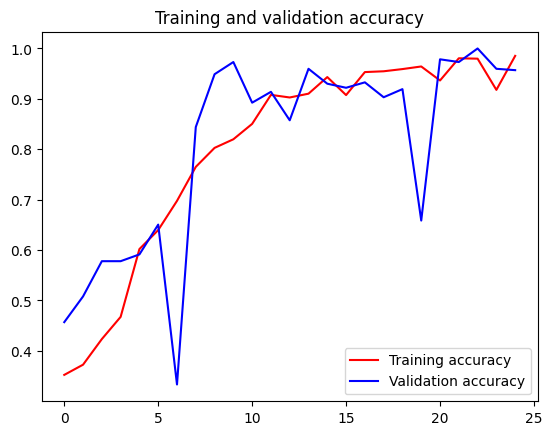

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [15]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving download.jfif to download (4).jfif
1/1 [==============================] - 0s 27ms/step
download (4).jfif
[[0. 0. 1.]]
